# Data Processing

Using pandas package 

In [1]:
# Import data
import pandas as pd
bank=pd.read_csv('bank.csv',sep=';')
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [2]:
# Change all the strings into number, adding "-number' in the end of the features' name

job_to_jobnumber={
    'admin.':-6,'blue-collar':-5,'entrepreneur':-4,'housemaid':-3,
    'management':-2,'retired':-1,'self-employed':1,'services':2,
    'student':3,'technician':4,'unemployed':5,'unknown':6
}
bank.insert(1,'jobnumber',bank['job'].map(job_to_jobnumber))
del bank['job']

marital_to_maritalnumber={
    'divorced':-2,'married':-1,'single':1,'unknown':2
}
bank.insert(2,'maritalnumber',bank['marital'].map(marital_to_maritalnumber))
del bank['marital']

education_to_educationnumber={
     'primary':-2,'secondary':-1,'tertiary':1,'unknown':2
}
bank.insert(3,'educationnumber',bank['education'].map(education_to_educationnumber))
del bank['education']

default_to_defaultnumber={
   'no':-1,'yes':0,'unknown':1
}
bank.insert(4,'defaultnumber',bank['default'].map(default_to_defaultnumber))
del bank['default']

housing_to_housingnumber={
    'no':-1,'yes':0,'unknown':1
}
bank.insert(6,'housingnumber',bank['housing'].map(housing_to_housingnumber))
del bank['housing']

loan_to_loannumber={
   'no':-1,'yes':0,'unknown':1
}
bank.insert(7,'loannumber',bank['loan'].map(loan_to_loannumber))
del bank['loan']

contact_to_contactnumber={
    'cellular':-1,'telephone':0,'unknown':1
}
bank.insert(8,'contactnumber',bank['contact'].map(contact_to_contactnumber))
del bank['contact']

month_to_monthnumber={
    'jan':1, 'feb':2, 'mar':3,'apr':4,'may':5,'jun':6,
    'jul':7,'aug':8,'sep':9,'oct':10, 'nov':11, 'dec':12
}
bank.insert(10,'monthnumber',bank['month'].map(month_to_monthnumber))
del bank['month']

poutcome_to_poutcomenumber={
    'failure':-2,'unknown':-1,'other':1,'success':2
}
bank.insert(15,'poutcomenumber',bank['poutcome'].map(poutcome_to_poutcomenumber))
del bank['poutcome']

y_to_ynumber={
    'yes':0,'no':1
}
bank.insert(16,'ynumber',bank['y'].map(y_to_ynumber))
del bank['y']

bank.head(5)

,age,jobnumber,maritalnumber,educationnumber,defaultnumber,balance,housingnumber,loannumber,contactnumber,day,monthnumber,duration,campaign,pdays,previous,poutcomenumber,ynumber
0,30,5,-1,-2,-1,1787,-1,-1,-1,19,10,79,1,-1,0,-1,1
1,33,2,-1,-1,-1,4789,0,0,-1,11,5,220,1,339,4,-2,1
2,35,-2,1,1,-1,1350,0,-1,-1,16,4,185,1,330,1,-2,1
3,30,-2,-1,1,-1,1476,0,0,1,3,6,199,4,-1,0,-1,1
4,59,-5,-1,-1,-1,0,0,-1,1,5,5,226,1,-1,0,-1,1


In [3]:
bank.shape

(4521, 17)

In [4]:
# Output data, naming bank-revise
bank.to_csv('bank-revise.csv',sep=',',index=False)

Doing by sklearn

In [5]:
# Import data
from sklearn import datasets
import numpy as np
bankdata=np.loadtxt('bank-revise.csv',skiprows=1,delimiter=',',dtype=int)
bankdata.shape
title=list(bank)

# An example for homework

Giving two features, I provide an example for the methods in ch03.
For more results, seeing conclusion part

In [6]:
# Using features age and month
a=0
b=10
a_head=title[a]
b_head=title[b]
print(a_head,b_head)

age monthnumber


In [7]:
#Define input & output
X=bankdata[:,[a,b]]
y=bankdata[:,16]
X

array([[30, 10],
       [33,  5],
       [35,  4],
       ...,
       [57,  8],
       [28,  2],
       [44,  4]])

splitting data into 70% training and 30% testing data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [9]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [ 521 4000]
Labels counts in y_train: [ 365 2799]
Labels counts in y_test: [ 156 1201]


standardizing the features:

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)




Training a perceptron via scikit-learn

In [11]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=50, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=50, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [12]:
# Accuracy testing
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Misclassified samples: 156
Accuracy: 0.89
Accuracy: 0.89


In [13]:
# Define a ploting function
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() -0.1, X[:, 0].max() +0.1
    x2_min, x2_max = X[:, 1].min() -0.1, X[:, 1].max() +0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

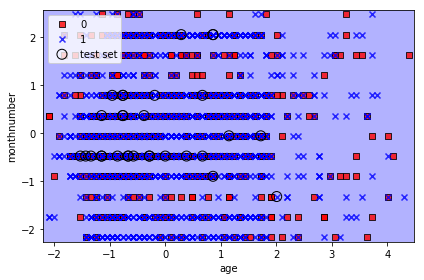

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(120, 150))
plt.xlabel(a_head)
plt.ylabel(b_head)
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()


A logistic regression model

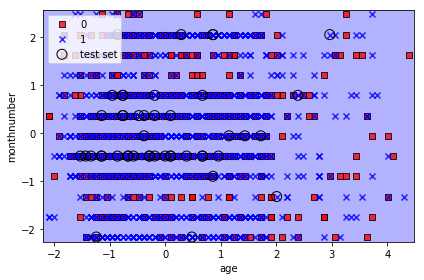

In [15]:
from sklearn.linear_model import LogisticRegression
ls = LogisticRegression(C=10.0, random_state=1)
ls.fit(X_train_std, y_train)
        
plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=ls, 
                      test_idx=range(105, 150))
plt.xlabel(a_head)
plt.ylabel(b_head)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



In [16]:
# Accuracy
y_pred =ls.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.2f' % ls.score(X_test_std, y_test))

Misclassified samples: 156
Accuracy: 0.89
Accuracy: 0.89


SVC

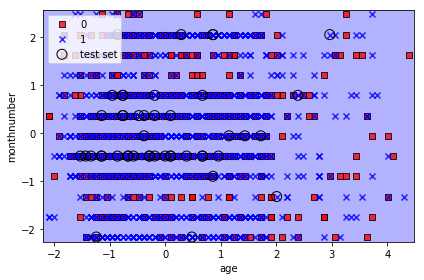

In [17]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=0.2, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel(a_head)
plt.ylabel(b_head)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
y_pred =svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.2f' % svm.score(X_test_std, y_test))

Misclassified samples: 156
Accuracy: 0.89
Accuracy: 0.89


Decision tree

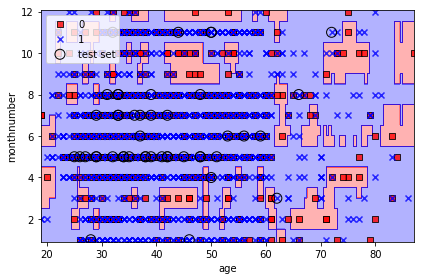

In [19]:
#Using forest
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel(a_head)
plt.ylabel(b_head)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [20]:
y_pred =forest.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.2f' % forest.score(X_test_std, y_test))

Misclassified samples: 156
Accuracy: 0.89
Accuracy: 0.89


K-nearest neighbors

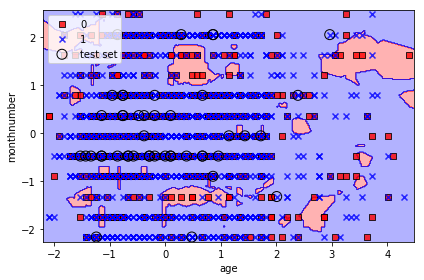

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel(a_head)
plt.ylabel(b_head)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
y_pred =knn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.2f' % knn.score(X_test_std, y_test))

Misclassified samples: 158
Accuracy: 0.88
Accuracy: 0.88


# Conclusion --- Testing all possibility

Use two features as input, checking which two features and what methods can lead to a higher accuracy score.

In [23]:
# To prevent output warning informations.
import warnings
warnings.filterwarnings('ignore')

In [24]:
# define methods dictionary in order to output methods
method_dict={
    0:'logistic regression', 1:'SVC', 2:'decision tree',3:'k-nearest neighbour'
    }

In [25]:
# Define Final Conclusion Matrix
import numpy as np

conclusion=np.zeros(shape=(15,4))

In [26]:
# Using for-loop, make "a" represent first features and "b" represent the second features. (b!=a)

for a in range(0,15):
    
    # Define matrixs to store accuarcy score
    matrix=np.zeros(shape=(15,4))
    
    for b in range(a+1,16):
        
        X=bankdata[:,[a,b]]
        y=bankdata[:,16]
        
        #spilt
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1, stratify=y) 
        
        #standardizing
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
        
        #logistic & accuary
        from sklearn.linear_model import LogisticRegression
        ls = LogisticRegression(C=10.0, random_state=1)
        ls.fit(X_train_std, y_train)

        y_pred =ls.predict(X_test_std)
        from sklearn.metrics import accuracy_score
        lsscore=accuracy_score(y_test, y_pred)
        
        #SVC & accuarcy
        from sklearn.svm import SVC
        svm = SVC(kernel='linear', C=0.2, random_state=1)
        svm.fit(X_train_std, y_train)

        y_pred =svm.predict(X_test_std)
        from sklearn.metrics import accuracy_score
        svmscore=accuracy_score(y_test, y_pred)

        #forest & accuarcy
        from sklearn.ensemble import RandomForestClassifier
        forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
        forest.fit(X_train, y_train)

        y_pred =forest.predict(X_test_std)
        from sklearn.metrics import accuracy_score
        forestscore=accuracy_score(y_test, y_pred)


        #k-nearest neighbour
        from sklearn.neighbors import KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors=5, 
                                   p=2, 
                                   metric='minkowski')
        knn.fit(X_train_std, y_train)

        y_pred =knn.predict(X_test_std)
        from sklearn.metrics import accuracy_score
        knnscore=accuracy_score(y_test, y_pred)
        matrix[b-1]=[lsscore,svmscore,forestscore,knnscore]
    
    #Result   
    print('The first feature is:',title[a])
    c=matrix.argmax()
    print('For largest accuracy score, the second feature is:',title[c//4+1])
    
    print('The methods using is :',method_dict[c%4] )
    d=matrix.max()
    print('max accuracy score',matrix.max(),'\n')
    
    conclusion[a]=[a+1,c//4+2,d,c%4]

The first feature is: age
For largest accuracy score, the second feature is: poutcomenumber
The methods using is : logistic regression
max accuracy score 0.8887251289609432 

The first feature is: jobnumber
For largest accuracy score, the second feature is: contactnumber
The methods using is : k-nearest neighbour
max accuracy score 0.8865143699336773 

The first feature is: maritalnumber
For largest accuracy score, the second feature is: poutcomenumber
The methods using is : k-nearest neighbour
max accuracy score 0.8901989683124539 

The first feature is: educationnumber
For largest accuracy score, the second feature is: poutcomenumber
The methods using is : logistic regression
max accuracy score 0.8901989683124539 

The first feature is: defaultnumber
For largest accuracy score, the second feature is: poutcomenumber
The methods using is : k-nearest neighbour
max accuracy score 0.8938835666912307 

The first feature is: balance
For largest accuracy score, the second feature is: housing

In [27]:
# The result
print('For largest accuracy number:',conclusion[int(conclusion[:,2].argmax()),2],'\n',
     'The features are:',title[int(conclusion[:,2].argmax())],',',title[int(conclusion[conclusion[:,2].argmax(),1]-1)],
      '\n',
     'The methods is', method_dict[int(conclusion[conclusion[:,2].argmax(),3])]
     )

For largest accuracy number: 0.8953574060427414 
 The features are: campaign , poutcomenumber 
 The methods is logistic regression


In [28]:
#Save result file
np.savetxt('conclusion.csv',conclusion,delimiter=',')

In [29]:
# Visualize the conclusion file
import pandas as pd
result=pd.read_csv('conclusion.csv',sep=',',header=None)
names=['first','second','accuracy score','method']
result.columns=names

In [30]:
features_dict={
 1:'age',2:'jobnumber',3:'maritalnumber',4:'educationnumber',5:'defaultnumber',6:'balance',
 7:'housingnumber',8:'loannumber',9:'contactnumber',10:'day',11:'monthnumber',12:'duration',
 13:'campaign',14:'pdays',15:'previous',16:'poutcomenumber'
}

result['first feature']=result['first'].map(features_dict)
result['second feature']=result['second'].map(features_dict)
result['method using']=result['method'].map(method_dict)
del result['first']
del result['second']
del result['method']
result

,accuracy score,first feature,second feature,method using
0,0.888725,age,poutcomenumber,logistic regression
1,0.886514,jobnumber,contactnumber,k-nearest neighbour
2,0.890199,maritalnumber,poutcomenumber,k-nearest neighbour
3,0.890199,educationnumber,poutcomenumber,logistic regression
4,0.893884,defaultnumber,poutcomenumber,k-nearest neighbour
5,0.885041,balance,housingnumber,logistic regression
6,0.894620,housingnumber,poutcomenumber,logistic regression
7,0.893884,loannumber,poutcomenumber,k-nearest neighbour
8,0.885041,contactnumber,day,logistic regression
9,0.888725,day,poutcomenumber,k-nearest neighbour
